### Analyses
- all neuronal pairwise correlations during sleep deprivation go here

### Distribution of pairwise correlations during SD from first to last hour of SD
- also compare with nsd 1st hour of sleep vs 5th hour sleep

In [ ]:
import numpy as np
import subjects
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from neuropy.plotting import Fig

sessions_sd = subjects.sd.allsess
sessions_nsd = subjects.nsd.allsess[:-1]

In [ ]:
%matplotlib inline
figure = Fig()
fig,gs = figure.draw(grid=(2,2),style='Pres')
gs_ = figure.subplot2grid(gs[:,1],grid=(5,2),hspace=0.5)
all_corr_sd = []

cdf = lambda x: np.cumsum(x)/np.sum(x)

bins = np.arange(-0.1,0.4,0.01)
for sub, sess in enumerate(sessions_sd):
    post = sess.paradigm['post']
    sd = [post[0],post[0]+5*3600]

    neurons = sess.neurons.get_neuron_type('pyr')
    cal_pair_corr=lambda t:neurons.get_binned_spiketrains(t_start=t,t_stop=t+3600).get_pairwise_corr()
    corr_pair = np.asarray( [cal_pair_corr(_) for _ in [sd[0],sd[0]+4*3600]])
    f_h = np.histogram(corr_pair[0],bins=bins)[0]
    l_h = np.histogram(corr_pair[1],bins=bins)[0]

    ax = plt.subplot(gs_[sub])
    ax.plot(bins[:-1],cdf(f_h))
    ax.plot(bins[:-1],cdf(l_h))
    ax.set_title(f'sub {sub}')
    all_corr_sd.append(corr_pair)

all_corr_nsd=[]
for sub, sess in enumerate(sessions_nsd,sub+2):
    post = sess.paradigm['post']

    neurons = sess.neurons.get_neuron_type('pyr')
    cal_pair_corr=lambda t:neurons.get_binned_spiketrains(t_start=t,t_stop=t+3600).get_pairwise_corr()
    corr_pair = np.asarray( [cal_pair_corr(_) for _ in [post[0],post[0]+4*3600]])
    f_h = np.histogram(corr_pair[0],bins=bins)[0]
    l_h = np.histogram(corr_pair[1],bins=bins)[0]

    ax = plt.subplot(gs_[sub])
    ax.plot(bins[:-1],cdf(f_h))
    ax.plot(bins[:-1],cdf(l_h))
    ax.set_title(f'sub {sub}')

    all_corr_nsd.append(corr_pair)




ax = plt.subplot(gs[0])
all_corr_sd = np.hstack(all_corr_sd)
first_h_sd = np.histogram(all_corr_sd[0],bins=bins)[0]
last_h_sd = np.histogram(all_corr_sd[1],bins=bins)[0]

all_corr_nsd = np.hstack(all_corr_nsd)
first_h_nsd = np.histogram(all_corr_nsd[0],bins=bins)[0]
last_h_nsd = np.histogram(all_corr_nsd[1],bins=bins)[0]

ax.plot(bins[:-1],cdf(first_h_sd),'r',label='sd_ZT1')
ax.plot(bins[:-1],cdf(last_h_sd),'g',label='sd_ZT5')
ax.plot(bins[:-1],cdf(first_h_nsd),'k',label='nsd_ZT1')
ax.plot(bins[:-1],cdf(last_h_nsd),'gray',label='nsd_ZT5')

ax.legend()
ax.set_xlabel('Pairwise correlation')
ax.set_ylabel('Probability')

### Compare pariwise correlation using scatter plot from first to last hour of sleep deprivation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from neuropy.plotting import Fig
from scipy.ndimage import gaussian_filter1d
import subjects

sd_sessions = subjects.sd.allsess[2:-1]
nsd_sessions = subjects.nsd.ratNday2 + subjects.nsd.ratSday2 + subjects.nsd.ratUday2
print(sd_sessions)

In [ ]:
pcorr_sd = []
pcorr_nsd = []
for grp_ind, sessions in enumerate([sd_sessions, nsd_sessions]):
    for sub, sess in enumerate(sessions):
        maze = sess.paradigm["maze"]
        rec_duration = sess.eegfile.duration
        neurons = sess.neurons.get_neuron_type("mua")

        bin_size = 60
        pcorr_sub = []
        for start in [maze[0], maze[0] + 4 * 3600]:
            pcorr = (
                neurons.time_slice(start, start + 3600)
                .get_binned_spiketrains(bin_size=bin_size)
                .get_pairwise_corr()
            )
            pcorr_sub.append(pcorr)
        pcorr_sub = np.asarray(pcorr_sub).T
    if grp_ind==0:
        pcorr_sd.append(pcorr_sub)

    if grp_ind==1:
        pcorr_nsd.append(pcorr_sub)

pcorr_sd = np.vstack(pcorr_sd)
pcorr_nsd = np.vstack(pcorr_nsd)

In [ ]:
%matplotlib inline
figure = Fig()
fig,gs = figure.draw(grid=(2,2),style='Pres')

for i,pcorr in enumerate([pcorr_sd,pcorr_nsd]):
    ax = plt.subplot(gs[i])
    ax.scatter(pcorr[:,0],pcorr[:,1],s=20,c='gray',marker='o',edgecolors='w')
    # ax.hexbin(pcorr[:,0],pcorr[:,1],cmap='inferno',gridsize=50)
    ax.axline((0,0),slope=1)
    ax.set_xlabel('First hour')
    ax.set_ylabel('Fifth hour')

### Pairwise correlation across time each session individually

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neuropy import plotting
from neuropy.utils import signal_process
import subjects
import pandas as pd
from neuropy.analyses import neurons_correlation

# sessions = subjects.sd.ratNday1+ subjects.sd.ratSday3+ subjects.sd.ratRday2 + subjects.sd.ratUday4

sessions = subjects.nsd.ratNday2 + subjects.nsd.ratSday2 + subjects.nsd.ratUday2


In [ ]:
# sessions = subjects.Sd().allsess + subjects.Nsd().allsess
pair_corr_all = []
for sub, sess in enumerate(sessions):
    neurons = sess.neurons.get_neuron_type('pyr')
    pair_corr = neurons_correlation.corr_across_time_window(neurons)
    np.fill_diagonal(pair_corr,val=0)
    pair_corr_all.append(pair_corr)

In [ ]:
%matplotlib widget
from scipy.ndimage import gaussian_filter
figure = plotting.Fig()
fig, gs = figure.draw(num=1, grid=(3, 2),hspace=0.25)

rat_names = ['Rat N','Rat S','Rat U']
for i,pair_corr in enumerate(pair_corr_all):
    ax = plt.subplot(gs[i])
    sns.heatmap(pair_corr,ax=ax,cmap='jet',rasterized=True)
    ax.set_title(f"{rat_names[i]}")

fig.suptitle('Window = 300 s, Bin size = 0.25 s')
figure.savefig(subjects.figpath_sd/'NSD_correlation_across_time')

### Pairwise correlation across pooled across sessions

In [ ]:
sessions = subjects.Sd().allsess + subjects.Nsd().allsess
# sessions = subjects.Sd().ratJday1
corr_sd, corr_nsd = [], []
for sub, sess in enumerate(sessions):

    pre = sess.epochs.pre
    maze1 = sess.epochs.maze
    if maze1 is None:
        maze1 = sess.epochs.maze1
    post = sess.epochs.post
    tag = sess.recinfo.animal.tag

    # --- break region into periods --------
    # bins = sess.utils.getinterval([post[0], post[0] + 5 * 3600], 2)
    # sess.spikes.stability.firingRate(periods=bins)
    spks = sess.spikes.pyr
    epochs = np.arange(post[0], post[0] + 8 * 3600, 300)
    corr = []
    for i in range(len(epochs) - 1):
        corr.append(
            sess.spikes.corr.pairwise(spikes=spks, period=[epochs[i], epochs[i + 1]])
        )
    corr = np.asarray(corr)

    if tag == "sd":
        corr_sd.append(corr)
    else:
        corr_nsd.append(corr)


def process_(corr_mat):
    corr_mat = np.hstack(corr_mat)
    corr_mask = np.ma.array(corr_mat, mask=np.isnan(corr_mat))
    corr_ = np.ma.corrcoef(corr_mask)
    np.fill_diagonal(corr_, 0)
    # corr_ = gaussian_filter(corr_, sigma=1)
    return corr_


corr_sd = process_(corr_sd)
corr_nsd = process_(corr_nsd)

time = np.linspace(0, 8, corr_sd.shape[0] + 1)

figure = Fig()
fig, gs = figure.draw(num=1, grid=(4, 3), wspace=0.3)
axsd = plt.subplot(gs[2])
im = axsd.pcolormesh(time[:-1], time[:-1], corr_sd, cmap="Spectral_r", rasterized=True)
axsd.set_xlabel("Time (h)")
axsd.set_ylabel("Time (h)")
cbar = fig.colorbar(im, ax=axsd)
cbar.outline.set_linewidth(1)


axnsd = plt.subplot(gs[5])
im = axnsd.pcolormesh(
    time[:-1], time[:-1], corr_nsd, cmap="Spectral_r", rasterized=True
)
axnsd.set_xlabel("Time (h)")
cbar = fig.colorbar(im, ax=axnsd)
cbar.outline.set_linewidth(1)
# cbar.set_label("correlation")

figure.savefig("correlation_time_window", __file__)

### Mean pairwise correlation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neuropy import plotting
from neuropy.utils import signal_process
import subjects
import pandas as pd
from neuropy.analyses import neurons_correlation

# sessions = (
#     subjects.sd.ratNday1
#     + subjects.sd.ratSday3
#     + subjects.sd.ratRday2
#     + subjects.sd.ratUday4
# )

sessions = subjects.nsd.ratNday2 + subjects.nsd.ratSday2 + subjects.nsd.ratUday2


In [ ]:
from neuropy.utils import mathutil

pcorr_df = pd.DataFrame()
for sub, sess in enumerate(sessions):

    neurons = sess.neurons.get_neuron_type("pyr")
    post = sess.paradigm["post"]
    sd = [post[0], post[0] + 5 * 3600]

    t_starts = np.arange(0, 5 * 3600 / 600) * 600 + sd[0]

    pcorr_sub = np.zeros(len(t_starts))
    for i, start in enumerate(t_starts):

        pair_corr = (
            neurons.time_slice(start, start + 600)
            .get_binned_spiketrains(bin_size=0.25)
            .get_pairwise_corr()
        )
        pcorr_sub[i] = np.nanmean(pair_corr)

    pcorr_df = pcorr_df.append(
        pd.DataFrame(
            {
                "bins": (t_starts - sd[0])/3600,
                "corr": mathutil.min_max_scaler(pcorr_sub),
                "sub": sub,
            }
        ),
        ignore_index=True,
    )


In [ ]:
%matplotlib widget

sns.lineplot(data=pcorr_df,x='bins',y='corr')

### Pairwise correlation scatter plot maze vs remaze

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import subjects

sessions = subjects.nsd.remaze + subjects.sd.remaze

In [ ]:
pair_corr_df = []
for sub, sess in enumerate(sessions):
    maze = sess.paradigm["maze"].flatten()
    remaze = sess.paradigm["re-maze"].flatten()

    neurons = sess.neurons.get_neuron_type("pyr")
    maze_frate = neurons.time_slice(*maze).firing_rate
    remaze_frate = neurons.time_slice(*remaze).firing_rate

    good_indices = np.logical_and(maze_frate > 0, remaze_frate > 0)
    neurons = neurons[good_indices]

    pair_corr = []
    for e in [maze, remaze]:
        pair_corr.append(
            neurons.time_slice(*e).get_binned_spiketrains(0.25).get_pairwise_corr()
        )
    
    df = pd.DataFrame(dict(maze=pair_corr[0],remaze=pair_corr[1],grp=sess.tag))
    pair_corr_df.append(df)

pair_corr_df = pd.concat(pair_corr_df,ignore_index=True)

subjects.GroupData().save(pair_corr_df,'remaze_maze_paircorr')

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pair_corr_df,x='maze',y='remaze',hue='grp')


### Pairwise correlations between Zt0-5 vs Zt5-end

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import subjects

sessions = subjects.nsd.pf_sess + subjects.sd.pf_sess

In [ ]:
pair_corr_df = []
for sub, sess in enumerate(sessions):
    maze = sess.paradigm["maze"].flatten()
    post = sess.paradigm["post"].flatten()

    e1 = [post[0], post[0] + 5 * 3600]
    e2 = [post[0] + 5 * 3600, post[1]]

    neurons = sess.neurons.get_neuron_type("pyr")
    e1_frate = neurons.time_slice(*e1).firing_rate
    e2_frate = neurons.time_slice(*e2).firing_rate

    good_indices = np.logical_and(e1_frate > 0, e2_frate > 0)
    neurons = neurons[good_indices]

    pair_corr = []
    for e in [e1, e2]:
        pair_corr.append(
            neurons.time_slice(*e).get_binned_spiketrains(0.25).get_pairwise_corr()
        )

    df = pd.DataFrame(dict(e1=pair_corr[0], e2=pair_corr[1], grp=sess.tag))
    pair_corr_df.append(df)

pair_corr_df = pd.concat(pair_corr_df, ignore_index=True)

subjects.GroupData().save(pair_corr_df, "post_first5_last5_paircorr")


In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

_,axs = plt.subplots(1,2,sharex=True,sharey=True)
axs = axs.reshape(-1)
for i, grp in enumerate(['NSD','SD']):
    df = pair_corr_df[pair_corr_df['grp']==grp]
    linreg = stats.linregress(df['e1'],df['e2'])
    sns.scatterplot(data=df,x='e1',y='e2',hue='grp',ax=axs[i])
    axs[i].set_title(f'r={linreg.rvalue.round(2)}, pvalue={linreg.pvalue}')


### Pairwise correlations between Zt5-end to remaze

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import subjects

sessions = subjects.nsd.remaze + subjects.sd.remaze

In [ ]:
pair_corr_df = []
for sub, sess in enumerate(sessions):
    maze = sess.paradigm["maze"].flatten()
    post = sess.paradigm["post"].flatten()
    remaze = sess.paradigm["re-maze"].flatten()

    e1 = [post[0] + 5 * 3600,post[1]]
    e2 = remaze

    neurons = sess.neurons.get_neuron_type("pyr")
    e1_frate = neurons.time_slice(*e1).firing_rate
    e2_frate = neurons.time_slice(*e2).firing_rate

    good_indices = np.logical_and(e1_frate > 0, e2_frate > 0)
    neurons = neurons[good_indices]

    pair_corr = []
    for e in [e1, e2]:
        pair_corr.append(
            neurons.time_slice(*e).get_binned_spiketrains(0.25).get_pairwise_corr()
        )

    df = pd.DataFrame(dict(e1=pair_corr[0], e2=pair_corr[1], grp=sess.tag))
    pair_corr_df.append(df)

pair_corr_df = pd.concat(pair_corr_df, ignore_index=True)

subjects.GroupData().save(pair_corr_df, "remaze_last5_paircorr")


In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

_,axs = plt.subplots(1,2,sharex=True,sharey=True)
axs = axs.reshape(-1)
for i, grp in enumerate(['NSD','SD']):
    df = pair_corr_df[pair_corr_df['grp']==grp]
    linreg = stats.linregress(df['e1'],df['e2'])
    sns.scatterplot(data=df,x='e1',y='e2',hue='grp',ax=axs[i])
    axs[i].set_title(f'r={linreg.rvalue.round(2)}, pvalue={linreg.pvalue}')


### Pairwise correlations between Zt0-5 vs remaze

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import subjects

sessions = subjects.nsd.remaze + subjects.sd.remaze

In [ ]:
pair_corr_df = []
for sub, sess in enumerate(sessions):
    maze = sess.paradigm["maze"].flatten()
    post = sess.paradigm["post"].flatten()
    remaze = sess.paradigm["re-maze"].flatten()

    e1 = [post[0],post[0] + 5 * 3600]
    e2 = remaze

    neurons = sess.neurons.get_neuron_type("pyr")
    e1_frate = neurons.time_slice(*e1).firing_rate
    e2_frate = neurons.time_slice(*e2).firing_rate

    good_indices = np.logical_and(e1_frate > 0, e2_frate > 0)
    neurons = neurons[good_indices]

    pair_corr = []
    for e in [e1, e2]:
        pair_corr.append(
            neurons.time_slice(*e).get_binned_spiketrains(0.25).get_pairwise_corr()
        )

    df = pd.DataFrame(dict(e1=pair_corr[0], e2=pair_corr[1], grp=sess.tag))
    pair_corr_df.append(df)

pair_corr_df = pd.concat(pair_corr_df, ignore_index=True)

subjects.GroupData().save(pair_corr_df, "remaze_first5_paircorr")


In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

_,axs = plt.subplots(1,2,sharex=True,sharey=True)
axs = axs.reshape(-1)
for i, grp in enumerate(['NSD','SD']):
    df = pair_corr_df[pair_corr_df['grp']==grp]
    linreg = stats.linregress(df['e1'],df['e2'])
    sns.scatterplot(data=df,x='e1',y='e2',hue='grp',ax=axs[i])
    axs[i].set_title(f'r={linreg.rvalue.round(2)}, pvalue={linreg.pvalue}')


### Correlation of pairwise correlations across time for remaze sessions

In [ ]:
import numpy as np
import subjects

sessions = subjects.nsd.ratSday2 + subjects.sd.ratSday3

In [ ]:
import pingouin as pg

corr=[]
for sub, sess in enumerate(sessions):
    rec_duration = sess.eegfile.duration
    neurons = sess.neurons.get_neuron_type("pyr")

    windows = np.arange(0, rec_duration, 300)
    pair_corr = []
    for w in windows[:-1]:
        pair_corr.append(
            neurons.time_slice(w,w+300).get_binned_spiketrains().get_pairwise_corr()
        )
    pair_corr = np.array(pair_corr).T
    df = pd.DataFrame(pair_corr,columns=np.arange(len(windows)-1))
    corr.append(df.corr().values)
subjects.GroupData().save(corr,'remaze_corr_across_session')

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt

_,axs = plt.subplots(1,2)
axs = axs.reshape(-1)

for i in range(2):
    axs[i].imshow(corr[i])


### Autocorrelation of correlation matrix during Zt0-5 of SD vs NSD
 - get a correlation of pairwise correlations only during Zt0-5 and perform a autocorrelation on this matrix. It was done to find if there is a shorter decay curve of SD compared to NSD.
 - Tried both 2d correlation and autocorrelation of each row, the result looks like a blob, nothing interesting here.

In [ ]:
import numpy as np
import subjects
import pandas as pd

sessions = subjects.nsd.ratSday2 + subjects.sd.ratSday3

In [ ]:
import pingouin as pg

corr=[]
for sub, sess in enumerate(sessions):
    post = sess.paradigm['post'].flatten()
    neurons = sess.neurons.get_neuron_type("pyr")
    windows = np.arange(post[0], post[0]+5*3600, 300)
    pair_corr = []
    for w in windows[:-1]:
        pair_corr.append(
            neurons.time_slice(w,w+300).get_binned_spiketrains().get_pairwise_corr()
        )
    pair_corr = np.array(pair_corr).T
    df = pd.DataFrame(pair_corr,columns=np.arange(len(windows)-1))
    corr.append(df.corr().values)
subjects.GroupData().save(corr,'remaze_corr_across_session')

In [ ]:
%matplotlib widget
import scipy.signal as sg
import matplotlib.pyplot as plt

_,axs = plt.subplots(2,2)
# axs = axs.reshape(-1)

for i,c in enumerate(corr):
    np.fill_diagonal(c,0)
    ac = []
    for c_ in c: 
        ac.append(sg.correlate(c_,c_,mode='same'))
    ac = np.array(ac)
    axs[0,i].imshow(c,cmap='jet')
    axs[1,i].imshow(ac,cmap='jet')



### Pairwise correlation (Zt0-5) quantiles temporal evolution durign recovery sleep 

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import subjects

sessions = subjects.sd.pf_sess

In [ ]:
template_corr,pair_corr= [],[]
for sub, sess in enumerate(sessions):
    post = sess.paradigm["post"].flatten()
    neurons = sess.neurons.get_neuron_type("pyr")
    template = [post[0] + 2.5 * 3600, post[0] + 5 * 3600]

    template_corr.append(
        neurons.time_slice(*template).get_binned_spiketrains().get_pairwise_corr()
    )

    windows = np.arange(post[0]+5*3600,post[0]+8*3600,300)

    pair_corr_sub = []
    for w in windows[:-1]:
        pair_corr_sub.append(
            neurons.time_slice(w, w + 300).get_binned_spiketrains().get_pairwise_corr()
        )
    pair_corr.append(np.array(pair_corr_sub).T)

template_corr = np.concatenate(template_corr)
pair_corr = np.vstack(pair_corr)
# subjects.GroupData().save(corr, "t_corr_across_session")


In [ ]:
quantiles = pd.qcut(template_corr,5,labels=False)

mean_corr=[]
mean_template=[]
for i in range(5):
    mean_corr.append(np.nanmean(pair_corr[quantiles==i,:],axis=0))
    mean_template.append(np.nanmean(template_corr[quantiles==i]))

mean_corr = np.array(mean_corr)
mean_template = np.array(mean_template)
ratio = (mean_corr-mean_template[:,np.newaxis])/mean_template[:,np.newaxis]

In [ ]:
%matplotlib widget

for i,mc in enumerate(ratio):
    plt.plot(mc,label=i)

plt.legend()

### Distribution of pairwise correlations during Zt0-5 comaprison SD vs NSD

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import subjects

sessions = subjects.nsd.pf_sess + subjects.sd.pf_sess

In [ ]:
pair_corr_df = []
for sub, sess in enumerate(sessions):
    post = sess.paradigm["post"].flatten()
    neurons = sess.neurons.get_neuron_type("pyr")
    e1 = [post[0], post[0] + 5 * 3600]
    e2= [post[0] + 5 * 3600, post[1]]

    pcorr_e1 = (
        neurons.time_slice(*e1).get_binned_spiketrains().get_pairwise_corr()
    )
    pcorr_e2 = (
        neurons.time_slice(*e2).get_binned_spiketrains().get_pairwise_corr()
    )

    pair_corr_df.append(
        pd.DataFrame(dict(pcorr_first5=pcorr_e1, pcorr_last5=pcorr_e2, grp=sess.tag))
    )

pair_corr_df = pd.concat(pair_corr_df, ignore_index=True)
# subjects.GroupData().save(corr, "t_corr_across_session")


In [ ]:
%matplotlib widget
import seaborn as sns

sns.histplot(
    data=pair_corr_df,
    x="pcorr_first5",
    hue="grp",
    stat="probability",
    fill=False,
    element="step",
    common_bins=True,
    common_norm=False,
    palette=subjects.colors_sd(1),
    # kde=True,
    # cumulative=True,
)

sns.histplot(
    data=pair_corr_df,
    x="pcorr_last5",
    hue="grp",
    stat="probability",
    fill=False,
    element="step",
    common_bins=True,
    common_norm=False,
    palette=subjects.colors_sd(1.7),
    # log_scale=True,
    # cumulative=True,
)

plt.legend(['NSD_Zt0-5','SD_Zt0-5','NSD_Zt5-end','SD_Zt5-end'])
plt.xlim([-0.05,0.17])


### Pairwise correlations NSD early sleep vs SD recovery sleep
- Are they different ?
- Comapring distribution of pairwise correlations
- Results: Observed that during recovery sleep negative correlations are pushed towards zero. This may be an effect of higher delta oscillations during recovery sleep i.e, neurons are more synchronized during recovery sleep. 

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import subjects

sessions = subjects.nsd.pf_sess + subjects.sd.pf_sess

In [ ]:
pair_corr_df = []
for sub, sess in enumerate(sessions):
    post = sess.paradigm["post"].flatten()
    neurons = sess.neurons.get_neuron_type("pyr")

    if sess.tag == "NSD":
        period = [post[0], post[0] + 4 * 3600]
        label = f"{sess.tag} Zt0-4 h POST"
    else:
        period = [post[0] + 5 * 3600, post[1]]
        label = f"{sess.tag} rec. slp."

    pcorr_125 = (
        neurons.time_slice(*period)
        .get_binned_spiketrains(bin_size=0.125)
        .get_pairwise_corr()
    )
    pcorr_250 = (
        neurons.time_slice(*period)
        .get_binned_spiketrains(bin_size=0.250)
        .get_pairwise_corr()
    )

    pair_corr_df.append(
        pd.DataFrame(dict(pcorr_125=pcorr_125, pcorr_250=pcorr_250, grp=sess.tag))
    )
pair_corr_df = pd.concat(pair_corr_df, ignore_index=True)
# subjects.GroupData().save(corr, "t_corr_across_session")


In [ ]:
%matplotlib widget
import seaborn as sns
from neuropy.plotting import Fig

fig = Fig(grid=(2, 1), fontsize=10)
ax = fig.subplot(fig.gs[0])

bins = np.linspace(-0.1, 0.3, 200)
sns.histplot(
    data=pair_corr_df,
    x="pcorr_250",
    hue="grp",
    stat="probability",
    fill=False,
    element="step",
    # common_bins=True,
    bins=bins,
    common_norm=False,
    hue_order=["NSD", "SD"],
    palette=subjects.colors_sd(1),
    # kde=True,
    # cumulative=True,
    lw=2,
    ax=ax,
)


ax.set_xlabel("Pairwise correlations")
ax.set_title(
    "Distribution of pairwise correlations between regular sleep and recovery sleep\n"
)

sns.histplot(
    data=pair_corr_df,
    x="pcorr_125",
    hue="grp",
    stat="probability",
    fill=False,
    element="step",
    # common_bins=True,
    bins=bins,
    common_norm=False,
    hue_order=["NSD", "SD"],
    palette=subjects.colors_sd(1.7),
    # kde=True,
    # cumulative=True,
    lw=2,
    ax=ax,
)


ax.legend(frameon=False)
fig.legend(
    ax,
    ["NSD Zt0-4 h", "SD recovery sleep"],
    subjects.colors_sd(1),
    fontsize=10,
    dy=0.05,
)
# ax.axvline(np.nanmean(pair_corr_df[pair_corr_df["grp"] == "NSD"].pcorr.mean()),color='k')
# ax.axvline(np.nanmean(pair_corr_df[pair_corr_df["grp"] == "SD"].pcorr.mean()),color='r')
# ax.set_ylabel("Pairwise correlations")
# plt.xscale('log')
# plt.yscale('log')
# plt.legend(['NSD_Zt0-5','SD_Zt0-5','NSD_Zt5-end','SD_Zt5-end'])
# plt.xlim([-0.05,0.17])
# stats.kruskal(
#     pair_corr_df[pair_corr_df["grp"] == "NSD"].pcorr,
#     pair_corr_df[pair_corr_df["grp"] == "NSD"].pcorr,
#     nan_policy="omit",
# )


### CCG of pairs with negative correlations
- Check what does CCG of a negative pairwise correlation look like.
- It seems, negative pairs have stronger dip in 20 to 100 ms region comapred to baseline (200 ms).
- One observation is that negative correlation pairs are have higher theta modulation.


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import subjects

sessions = subjects.sd.pf_sess

In [ ]:
from neuropy.utils.neurons_util import calculate_neurons_ccg

pair_corr, ccgs_all = [], []
for sub, sess in enumerate(sessions):
    post = sess.paradigm["post"].flatten()
    neurons = sess.neurons.get_neuron_type("pyr")
    frate_bool = neurons.firing_rate > 0
    neurons = neurons[frate_bool]
    e1 = [post[0]+5*3600, post[1]]

    pcorr_e1 = (
        neurons.time_slice(*e1)
        .get_binned_spiketrains(bin_size=0.125)
        .get_pairwise_corr()
    )
    ccgs, t = calculate_neurons_ccg(neurons, bin_size=0.001, window_size=1)
    indices = np.tril_indices(neurons.n_neurons, k=-1)
    ccgs = ccgs[indices[0], indices[1], :]

    pair_corr.append(pcorr_e1)
    ccgs_all.append(ccgs)

pair_corr = np.concatenate(pair_corr)
ccgs_all = np.vstack(ccgs_all)

sort_ind = np.argsort(pair_corr)
pair_corr = pair_corr[sort_ind]
ccgs_all = ccgs_all[sort_ind, :]
ccgs_norm = ccgs_all / np.max(ccgs_all, axis=1, keepdims=True)


In [ ]:
%matplotlib widget
import seaborn as sns

nt = ccgs_all.shape[1]
center = nt//2
_,[[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2)

ax1.scatter(pair_corr,ccgs_all[:,center],s=3,c='gray')
ax1.set_yscale('log')

ccg_zscore =stats.zscore(ccgs_norm,axis=1)  
good_indices = ~np.isnan(np.sum(ccg_zscore,axis=1))
ax2.imshow(ccg_zscore[good_indices,:],aspect='auto',cmap='jet',vmin=0,vmax=0.5,extent=[t[0],t[-1],0,len(np.where(good_indices)[0])])
ax2.set_ylabel('Pairs')
ax2.set_xlabel('Time (ms)')

neg_ind = np.where(pair_corr<0)[0]
pos_ind = np.where(pair_corr>0)[0]

pos_mean =np.nanmean(ccgs_norm[pos_ind,:],axis=0) 
neg_mean =np.nanmean(ccgs_norm[neg_ind,:],axis=0) 
ax3.plot(t,stats.zscore(neg_mean),'#FF4081')
ax3.plot(t,stats.zscore(pos_mean),'#00C853')
ax3.set_ylabel('Normalized count (zscored)')
ax3.set_xlabel('Time (ms)')
ax3.legend(['negative','positive'])
ax3.set_title('Mean CCG of negative and positively correlated pairs')


### Reactivation of pairwise correlation quantiles during POST
- Does each quantile of correlation have different decay rate ?
- Maybe best understood if all correlations from all the sessions are pooled together.

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import subjects

sessions = subjects.sd.pf_sess

In [2]:
pair_corr_all = []
for sub, sess in enumerate(sessions):
    pre = sess.paradigm['pre'].flatten()
    maze = sess.paradigm["maze"].flatten()
    post = sess.paradigm["post"].flatten()

    neurons = sess.neurons.get_neuron_type("pyr")
    post_bins = np.arange(post[0],post[0]+5*3600, 300)
    post_epochs = np.vstack((post_bins[:-1],post_bins[1:])).T
    
    all_epochs = np.vstack([pre,maze,post_epochs])

    pair_corr = []
    for e in all_epochs:
        pair_corr.append(
            neurons.time_slice(*e).get_binned_spiketrains(0.25).get_pairwise_corr()
        )
    pair_corr = np.array(pair_corr).T

    pair_corr_all.append(pair_corr)

pair_corr_all = np.vstack(pair_corr_all)

/home/bapung/miniconda3/envs/data_analysis/lib/python3.10/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.10/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.10/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.10/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.10/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.10/site-packages/num

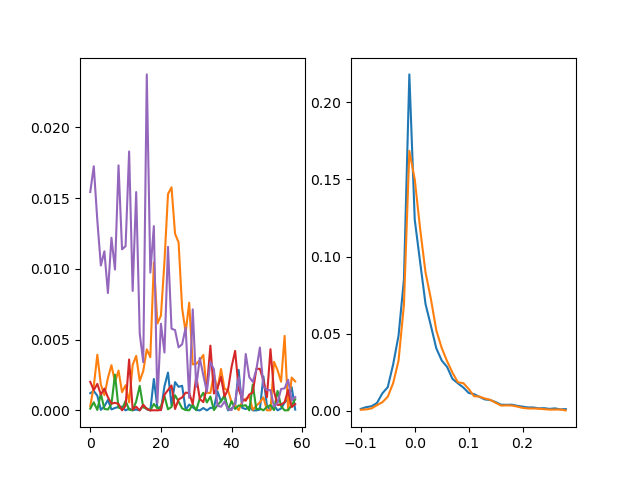

In [7]:
%matplotlib widget
import pingouin as pg

_,axs = plt.subplots(1,2)
axs = axs.reshape(-1)

pre_corr = pair_corr_all[:,0]
maze_corr = pair_corr_all[:,1]
quantiles = pd.qcut(maze_corr,5,labels=False)
# quantiles = pd.qcut(pre_corr,5,labels=False)

ev_quantile = []
quantile_boundary = []
for q in range(5):
    quantile_boundary.append(pair_corr_all[quantiles==q,1].max())
    mat = pair_corr_all[quantiles==q,:]
    df = pd.DataFrame(mat,columns=np.arange(mat.shape[1]))
    
    ev = []
    for y in range(2,61):
        stats = pg.partial_corr(data=df,x=1,y=y,covar=0)
        ev.append(stats.r.values[0]**2)
    
    ev_quantile.append(np.array(ev))
    # mat_corr = df.corr().values
    # np.fill_diagonal(mat_corr,0)

    # axs[q].imshow(mat_corr,cmap='jet')
axs[0].plot(np.array(ev_quantile).T)

bins = np.arange(-0.1,0.3,0.01)
hist_paircorr = np.histogram(maze_corr[~np.isnan(maze_corr)],bins=bins)[0]
hist_pre = np.histogram(pre_corr[~np.isnan(pre_corr)],bins=bins)[0]
axs[1].plot(bins[:-1],hist_paircorr/hist_paircorr.sum())
axs[1].plot(bins[:-1],hist_pre/hist_pre.sum())
# for val in quantile_boundary[:-1]:
#     axs[1].axvline(val)